# OLS Regression

In [1]:
# Importing packages

import pandas as pd
import numpy as np

# To plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# For nomalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# Getting the data
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2019,1,1)
end = dt.datetime(2019,12,31)
dates = pd.date_range(start, end)

data = web.DataReader('IBM', 'yahoo', start, end)

# Printing the head of the dataset
print(data.head())

                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-01-02  115.980003  111.690002  112.010002  115.209999  4239900.0   
2019-01-03  114.879997  112.690002  114.529999  112.910004  4346700.0   
2019-01-04  117.489998  114.440002  114.910004  117.320000  4477800.0   
2019-01-07  118.830002  116.669998  117.500000  118.150002  3751200.0   
2019-01-08  120.570000  118.980003  119.660004  119.830002  4763600.0   

             Adj Close  
Date                    
2019-01-02  108.800987  
2019-01-03  106.628937  
2019-01-04  110.793617  
2019-01-07  111.577446  
2019-01-08  113.163979  


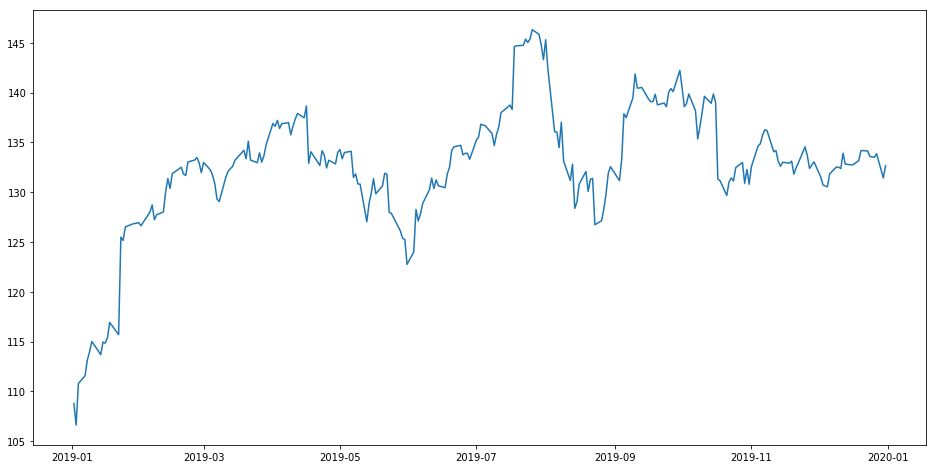

In [2]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(data['Adj Close'], label='Close Price history')

In [3]:
y = data['Adj Close']

train = data['2019-01-01':'2019-10-31']
test  = data['2019-11-01':]

In [167]:
print(len(train))

211


In [119]:
train.iloc[:,:5].head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-01-02,115.980003,111.690002,112.010002,115.209999,4239900.0
2019-01-03,114.879997,112.690002,114.529999,112.910004,4346700.0
2019-01-04,117.489998,114.440002,114.910004,117.320000,4477800.0
2019-01-07,118.830002,116.669998,117.500000,118.150002,3751200.0
2019-01-08,120.570000,118.980003,119.660004,119.830002,4763600.0


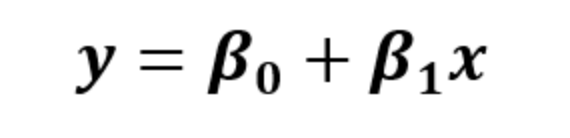

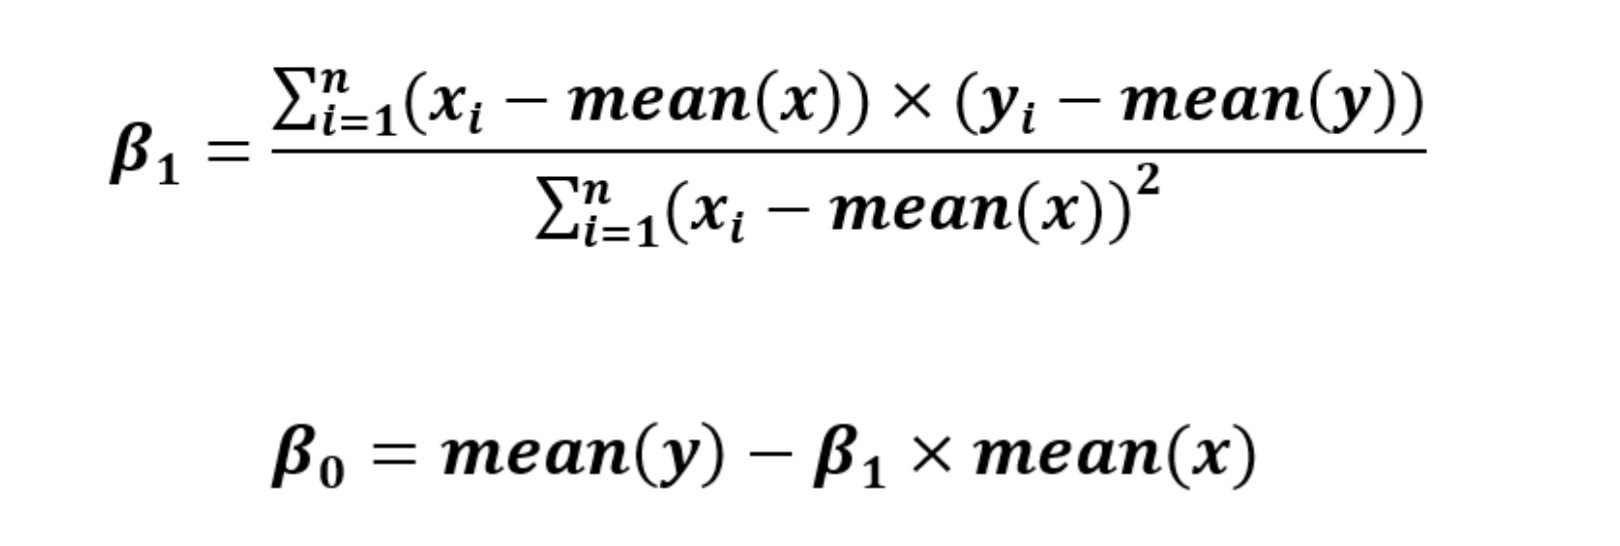

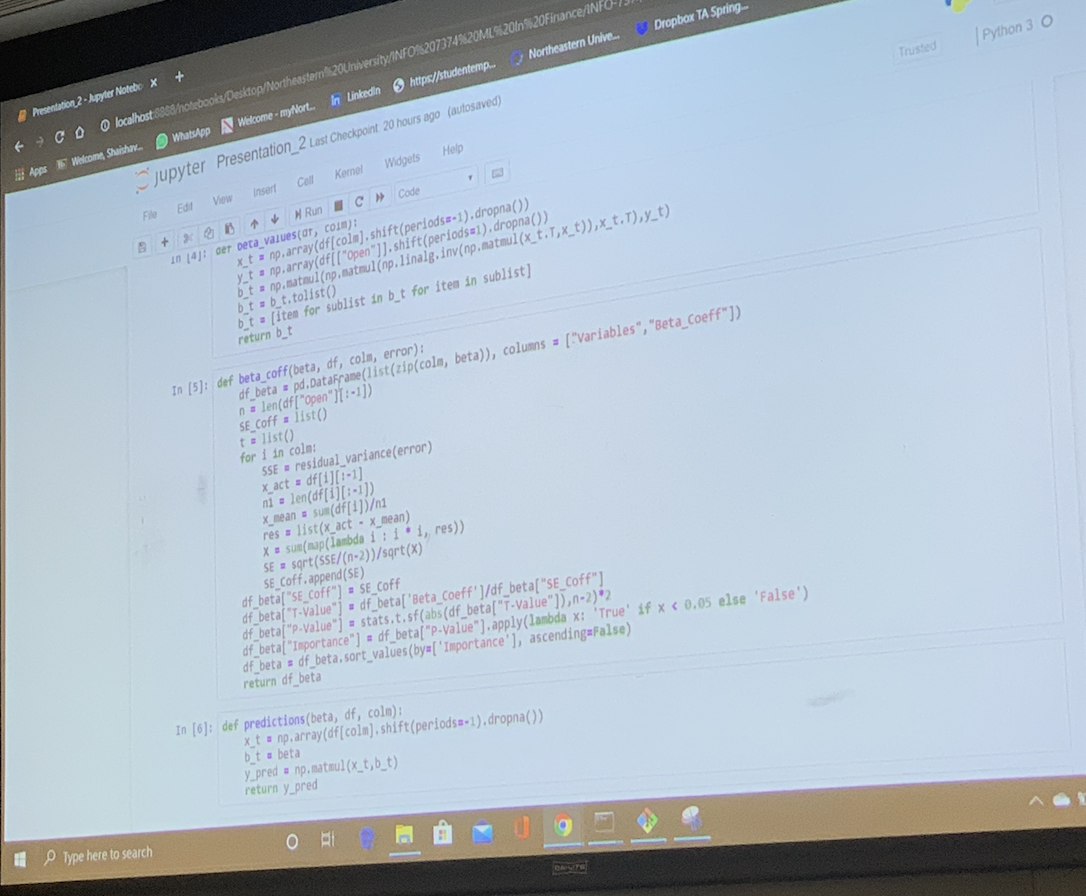

In [18]:
def get_fomula(x):
    global B1,B2,B3,B4,B5,B0
    x1 = x['High']
    B1 = (np.sum((x1 - np.mean(x1)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x1 - np.mean(x1)) ** 2)

    x2 = x['Low']
    B2 = (np.sum((x2 - np.mean(x2)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x2 - np.mean(x2)) ** 2)

    x3 = x['Open']
    B3 = (np.sum((x3 - np.mean(x3)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x3 - np.mean(x3)) ** 2)

    x4 = x['Close']
    B4 = (np.sum((x4 - np.mean(x4)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x4 - np.mean(x4)) ** 2)

    x5 = x['Volume']
    B5 = (np.sum((x5 - np.mean(x5)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x5 - np.mean(x5)) ** 2)

    B0 = np.mean(x['Adj Close']) - B1 * np.mean(x1) - B2 * np.mean(x2) - B3 * np.mean(x3) - B4 * np.mean(x4) - B5 * np.mean(x5)
    
    return B1,B2,B3,B4,B5,B0

In [128]:
# get_fomula(train)

In [19]:
# Calculating prediction

def calc_predictions(x):
    global p
    p = B0 + B1 * x['High'] + B2 * x['Low'] + B3 * x['Open'] + B4 * x['Close'] + B5 * x['Volume']
    return p



In [5]:
# # test

# X_test = train.iloc[:7,:]
# print(get_fomula(X_test))
# calc_predictions(train.iloc[7,:5])


In [112]:
X_test.index[:7]

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [20]:
def func(x,ma):
    global date, pred
    pred=[]
    index = x.index
    date=index[ma:]
    
    for i in range(len(x)-ma):
        x_train = x.iloc[:i+ma,:]
        
        
        get_fomula(x_train)
        
#         y_test=x['Adj Close'].iloc[i+ma+1]

        y_pred = calc_predictions(x.iloc[i+ma,:5])
        pred.append(y_pred)
        
    return pred,date

In [21]:
func(data,6)

([124.98326443591527,
  125.54024373249439,
  116.35597477102505,
  123.69018696999198,
  123.20896020405107,
  120.55347869019293,
  128.3188119448824,
  129.28373372732315,
  167.61318440017726,
  158.2068715427373,
  159.43827358546645,
  158.71310564435979,
  159.69597064849808,
  156.5633797830391,
  155.9982504881352,
  154.24715200218648,
  152.8578600691154,
  156.54852551970149,
  156.8003198415124,
  146.17897917167105,
  143.89292679196595,
  148.64937286256816,
  152.89820646392258,
  158.92024983481662,
  156.72940513803465,
  159.85838498845305,
  160.53399353563174,
  160.63769044586127,
  158.05078341502488,
  161.82633341302716,
  164.6327859541171,
  164.00057133220335,
  160.52088476948154,
  157.0816597116756,
  160.0960563836317,
  157.91188299207712,
  153.92772903542348,
  151.63183043921262,
  143.96328390906146,
  138.59312560191384,
  147.4533965695811,
  154.10999146503292,
  153.41728657259648,
  153.73785867365737,
  155.36081913978822,
  157.45640917278078

In [22]:
print(len(date))
print(len(pred))

246
246


In [23]:
import pandas as pd

df=pd.DataFrame(list(zip(date, pred)), 
               columns =['date', 'pred'])

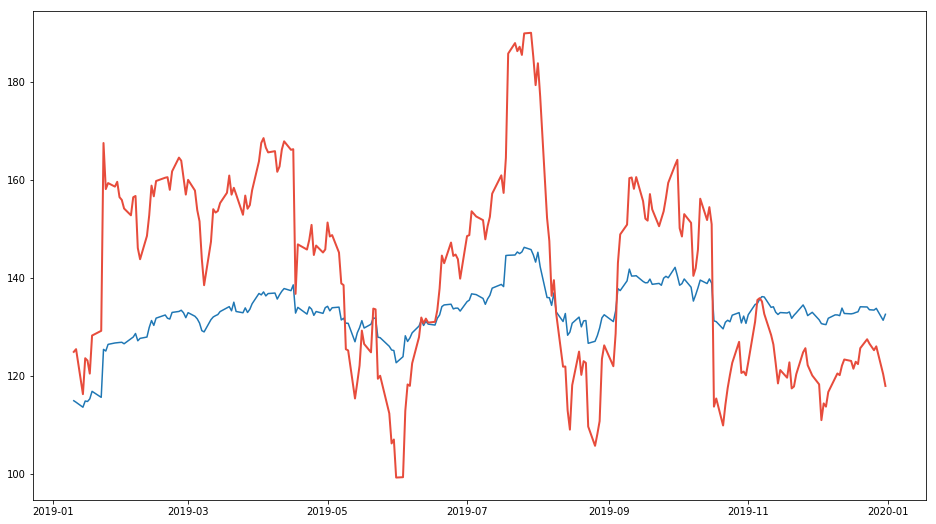

In [24]:
plt.figure(figsize = (16,9))
plt.plot(data.iloc[6:,:].index, data.iloc[6:,:]['Adj Close'])
plt.plot(df['date'], df['pred'], color = '#e74c3c', linewidth = 2)
plt.show()

In [25]:
#  Calculating RMSE 
def get_rmse(y_actual, y_predicted):
    return np.sqrt((np.sum((y_actual - y_predicted) ** 2)) / len(y_actual))

print(get_rmse(data['Adj Close'].iloc[6:], pred))

18.798967919893396


In [30]:
def get_fomula2(x):
    global B2,B3,B4,B0

    x2 = x['Low']
    B2 = (np.sum((x2 - np.mean(x2)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x2 - np.mean(x2)) ** 2)

    x3 = x['Open']
    B3 = (np.sum((x3 - np.mean(x3)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x3 - np.mean(x3)) ** 2)

    x4 = x['Close']
    B4 = (np.sum((x4 - np.mean(x4)) * (x['Adj Close'] - np.mean(x['Adj Close'])))) / np.sum((x4 - np.mean(x4)) ** 2)


    B0 = np.mean(x['Adj Close']) - B2 * np.mean(x2) - B3 * np.mean(x3) - B4 * np.mean(x4)
    
    return B2,B3,B4,B0

def calc_predictions2(x):
    global p
    p = B0  + B2 * x['Low'] + B3 * x['Open'] + B4 * x['Close']
    return p

In [31]:
def func(x,ma):
    global date2, pred2
    pred2=[]
    index = x.index
    date2=index[ma:]
    
    for i in range(len(x)-ma):
        x_train = x.iloc[:i+ma,:]
        
        get_fomula2(x_train)
        
#         y_test=x['Adj Close'].iloc[i+ma+1]

        y_pred = calc_predictions2(x.iloc[i+ma,:5])
        pred2.append(y_pred)
        
    return pred2,date2

In [32]:
func(data,6)

([120.63967922575718,
  121.30113829914445,
  118.27814169851054,
  120.15738433079905,
  120.06541654864549,
  119.10813547873202,
  124.30098732449687,
  121.69079101029533,
  144.51355292621497,
  147.40740741738585,
  148.461627895546,
  148.14239259097525,
  149.2932617860851,
  147.4149983639238,
  147.2883800906138,
  146.04631255294683,
  144.86772225889354,
  147.5340427819326,
  147.58531073880783,
  139.5724425811082,
  138.65460605383902,
  142.1006512402164,
  145.35198727672196,
  149.57096657997468,
  148.1916297376708,
  150.70191053717627,
  151.09107264077866,
  150.77909850882804,
  149.32215923888623,
  152.1942283254006,
  154.05086341379294,
  153.58069947323236,
  151.09337350952342,
  148.50022498429266,
  150.584088145535,
  148.64257052545463,
  146.49969542468688,
  144.1968613368606,
  138.76287503818403,
  134.94193476150065,
  141.4320596684079,
  146.21937968617772,
  145.75010439378235,
  146.3827295684599,
  148.75283094256537,
  149.1942318635049,
  15

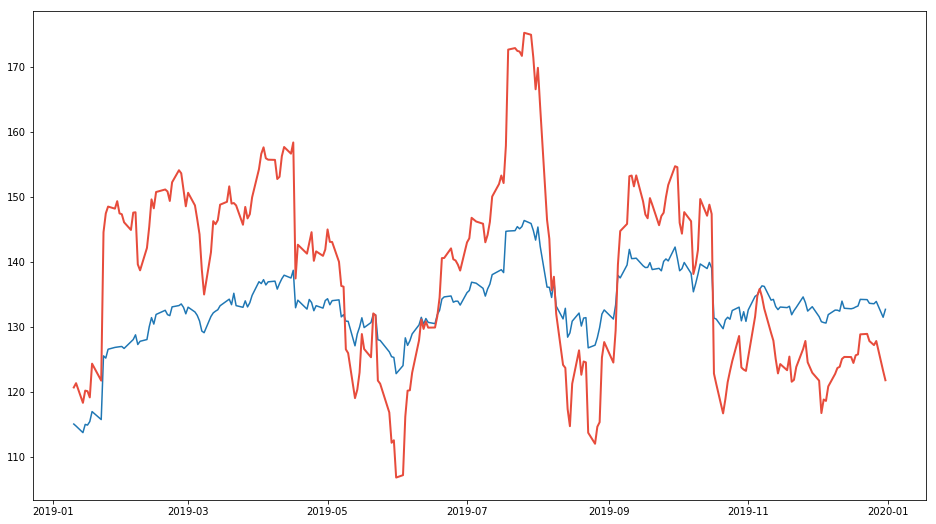

In [33]:
df=pd.DataFrame(list(zip(date2, pred2)), 
               columns =['date', 'pred'])

plt.figure(figsize = (16,9))
plt.plot(data.iloc[6:,:].index, data.iloc[6:,:]['Adj Close'])
plt.plot(df['date'], df['pred'], color = '#e74c3c', linewidth = 2)
plt.show()

In [35]:
print(get_rmse(data['Adj Close'].iloc[6:], pred2))

12.393479721955485
